In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.drop(['CustomerID'],axis=1, inplace = True)

In [8]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


C:\Users\Acer\AppData\Local\Temp\ipykernel_12184\1154144886.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x] , bins = 20)
C:\Users\Acer\AppData\Local\Temp\ipykernel_12184\1154144886.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x] , bins = 20)
C:\Users\Acer\AppData\Local\Temp\i

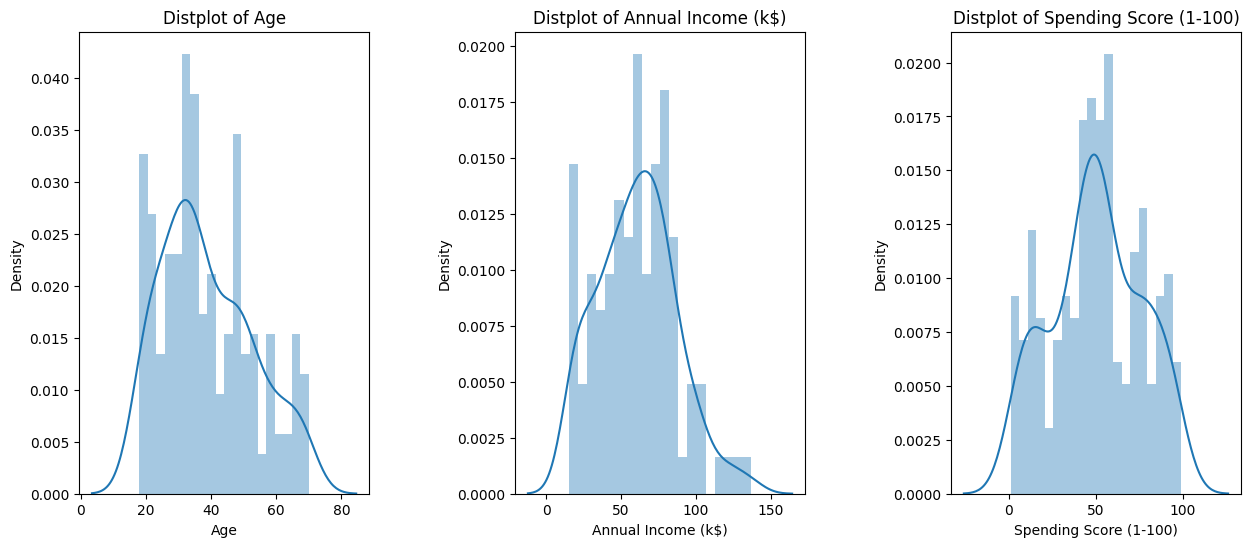

In [9]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

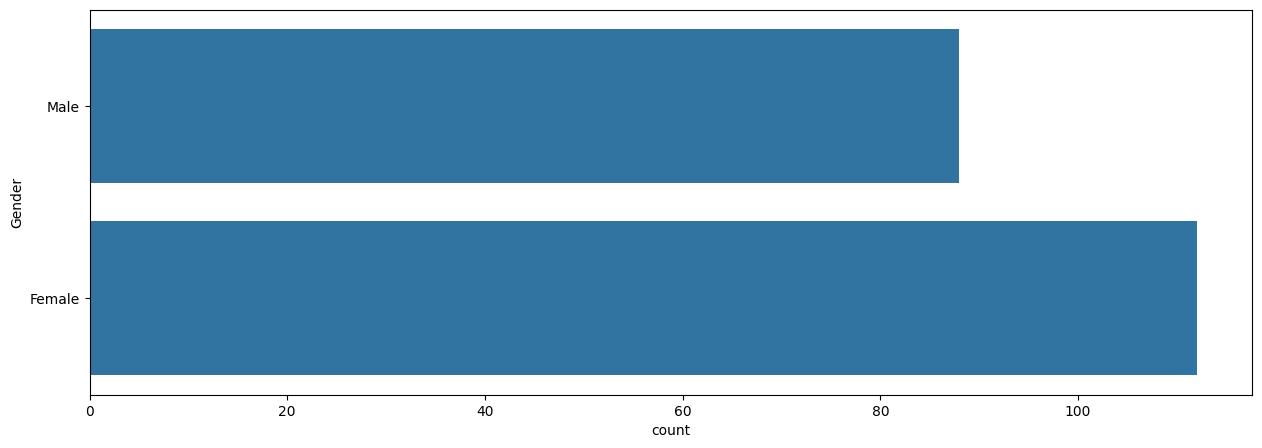

In [10]:
plt.figure(1, figsize=(15,5))
sns.countplot(y = 'Gender' , data=df)
plt.show()

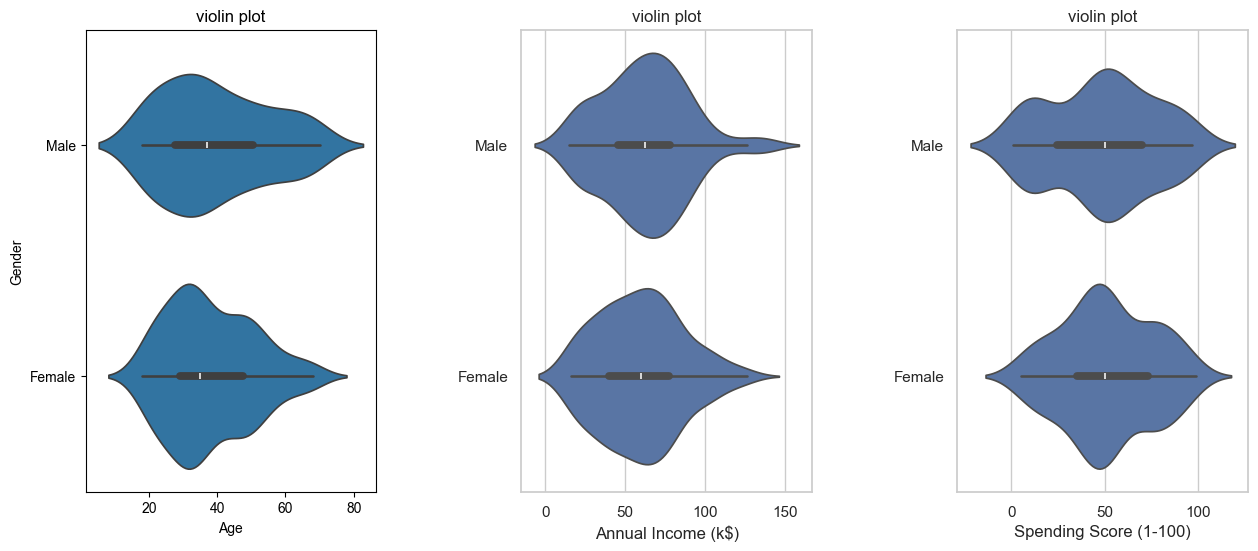

In [11]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    sns.set(style = 'whitegrid')
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.violinplot(x= cols , y = 'Gender' ,data = df)
    plt.ylabel ('Gender' if n==1 else '')
    plt.title('violin plot')
  
plt.show()

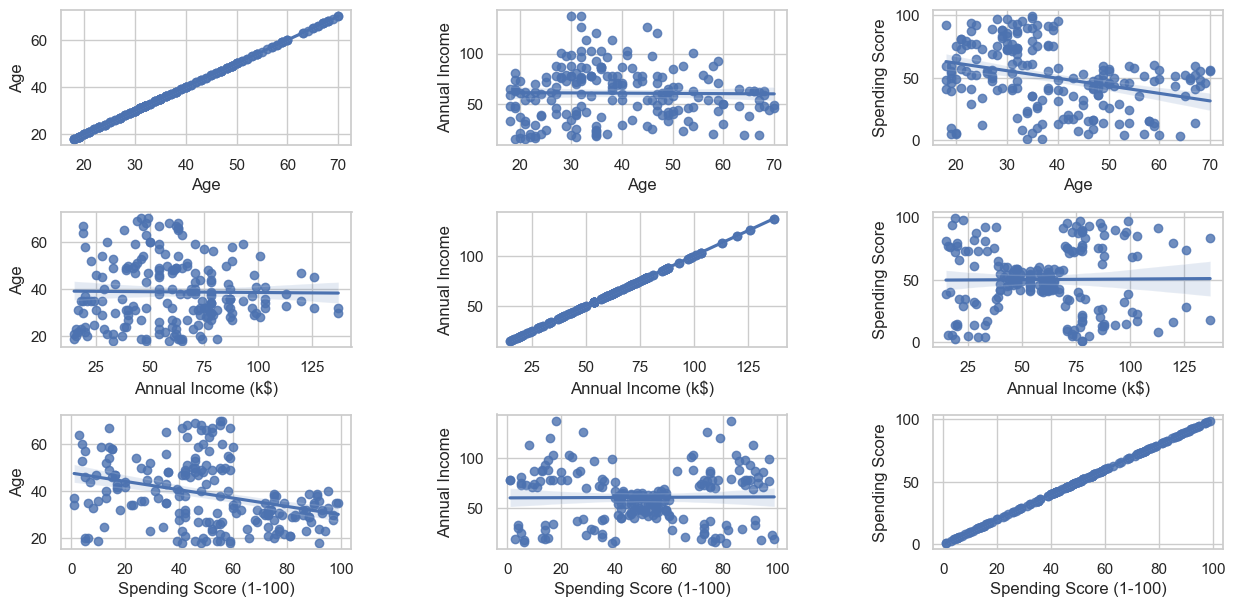

In [12]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

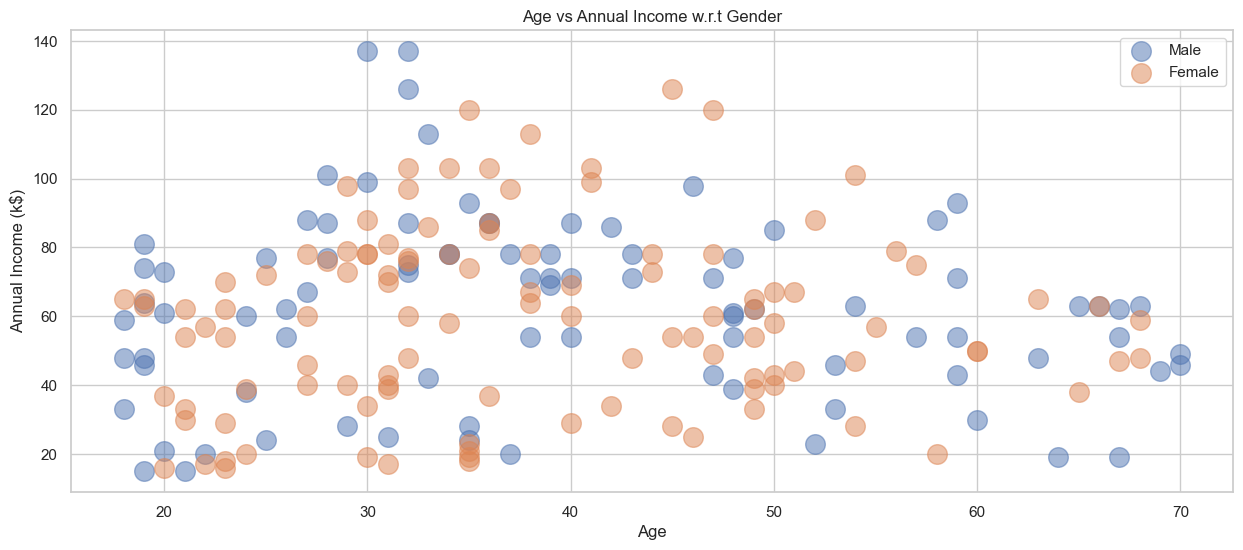

In [13]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = df[df['Gender'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)') 
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_12184\52616981.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=agex,y=agey,palette = 'mako')


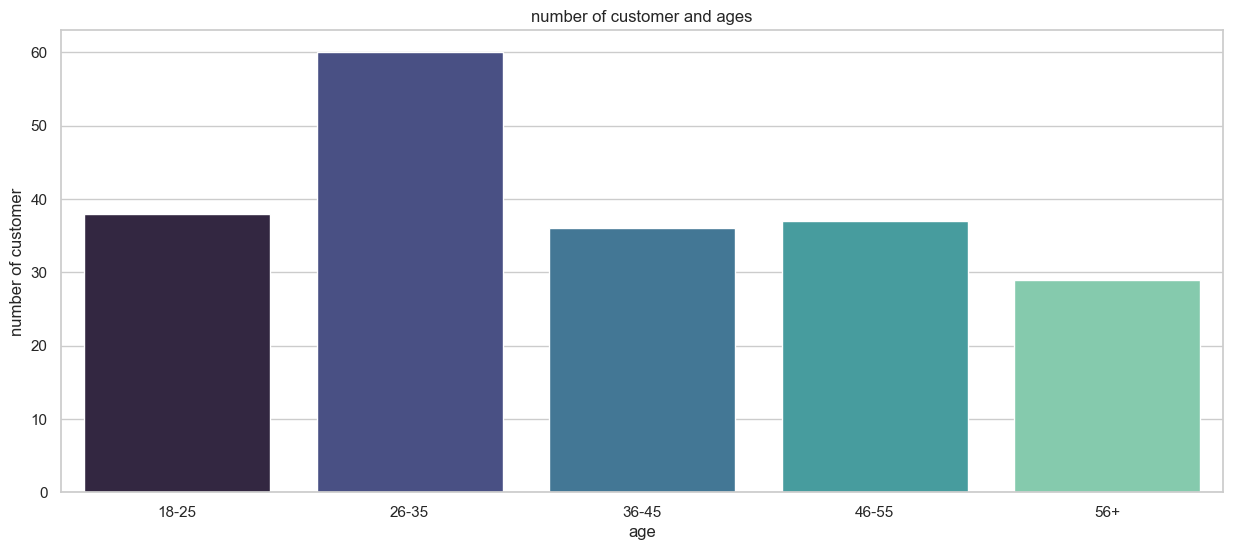

In [14]:
age_18_25 = df.Age[(df.Age >= 18) & (df.Age <= 25)]
age_26_35 = df.Age[(df.Age >= 26) & (df.Age <= 35)]
age_36_45 = df.Age[(df.Age >= 36) & (df.Age <= 45)]
age_46_55 = df.Age[(df.Age >= 46) & (df.Age <= 55)]
age_55above = df.Age[df.Age >= 56]
agex = ["18-25","26-35","36-45","46-55","56+"]
agey = [len(age_18_25.values),len(age_26_35.values),len(age_36_45.values),len(age_46_55.values),len(age_55above.values)]

plt.figure(figsize = (15,6))
sns.barplot(x=agex,y=agey,palette = 'mako')
plt.title('number of customer and ages')
plt.xlabel('age')
plt.ylabel('number of customer')
plt.show()

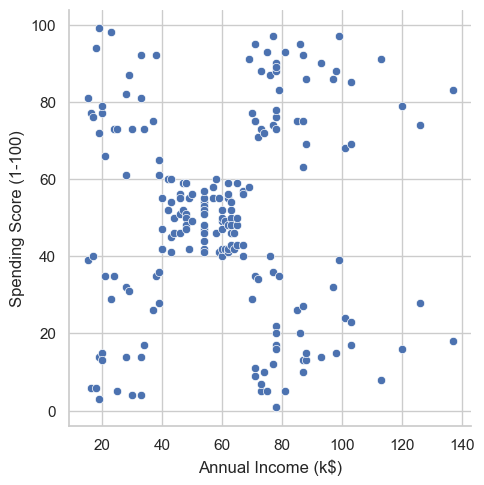

In [15]:
 sns.relplot(x= 'Annual Income (k$)',y='Spending Score (1-100)',data = df)

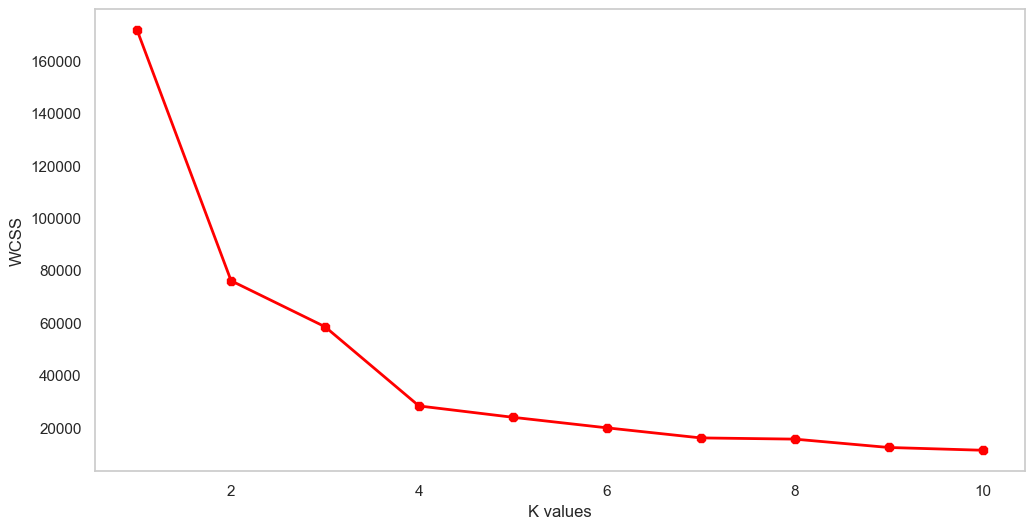

In [24]:
x1 = df.loc[: , [ "Age", "Spending Score (1-100)"]].values
from sklearn.cluster import KMeans
wcss = []
for  k in range(1,11):
    Kmeans = KMeans(n_clusters = k, init="k-means++")
    Kmeans.fit(x1)
    wcss.append(Kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color="red",marker="8")
plt.xlabel("K values")
plt.ylabel("WCSS")
plt.show()

In [26]:
Kmeans = KMeans(n_clusters=4)
label = Kmeans.fit_predict(x1)
print(label)

[2 0 3 0 2 0 3 0 3 0 3 0 3 0 3 0 2 2 3 0 2 0 3 0 3 0 3 2 3 0 3 0 3 0 3 0 3
 0 3 0 1 0 1 2 3 2 1 2 2 2 1 2 2 1 1 1 1 1 2 1 1 2 1 1 1 2 1 1 2 2 1 1 1 1
 1 2 1 2 2 1 1 2 1 1 2 1 1 2 2 1 1 2 1 2 2 2 1 2 1 2 2 1 1 2 1 2 1 1 1 1 1
 2 2 2 2 2 1 1 1 1 2 2 2 0 2 0 1 0 3 0 3 0 2 0 3 0 3 0 3 0 3 0 2 0 3 0 1 0
 3 0 3 0 3 0 3 0 3 0 3 0 1 0 3 0 3 0 3 0 3 2 3 0 3 0 3 0 3 0 3 0 3 0 3 0 1
 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0]


In [29]:
print(Kmeans.cluster_centers_)

[[30.1754386  82.35087719]
 [55.40816327 48.04081633]
 [27.32608696 49.36956522]
 [43.29166667 15.02083333]]


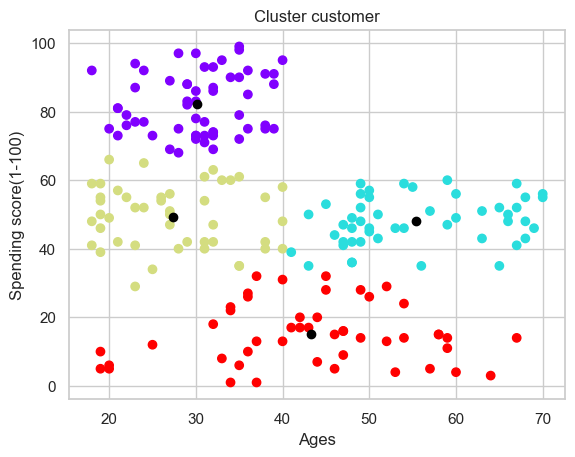

In [34]:
plt.scatter(x1[:,0],x1[:,1],c=Kmeans.labels_, cmap="rainbow")
plt.scatter(Kmeans.cluster_centers_[:,0] , Kmeans.cluster_centers_[:,1], color = "black")
plt.title("Cluster customer")
plt.xlabel("Ages")
plt.ylabel("Spending score(1-100)")
plt.show()

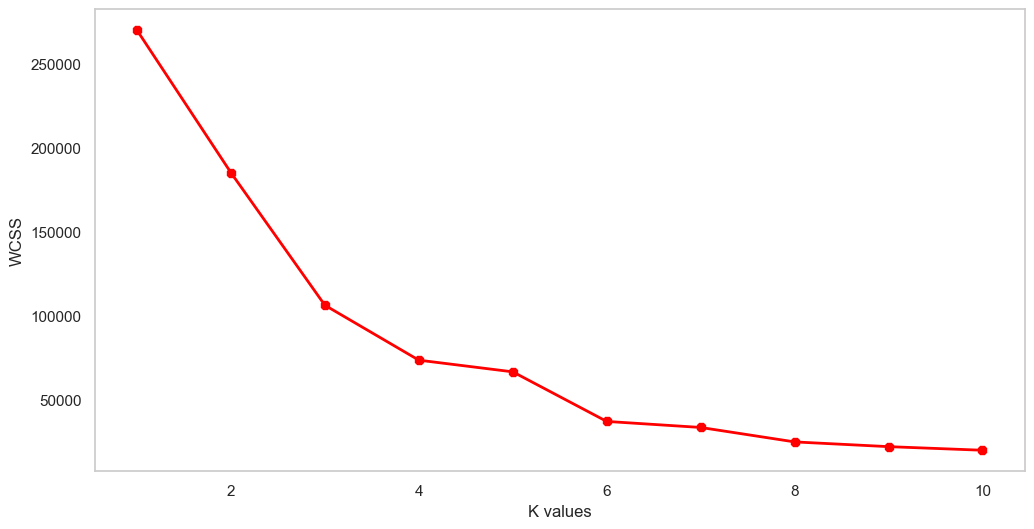

In [36]:
x2 = df.loc[: , [ "Annual Income (k$)", "Spending Score (1-100)"]].values
from sklearn.cluster import KMeans
wcss = []
for  k in range(1,11):
    Kmeans = KMeans(n_clusters = k, init="k-means++")
    Kmeans.fit(x2)
    wcss.append(Kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color="red",marker="8")
plt.xlabel("K values")
plt.ylabel("WCSS")
plt.show()

In [37]:
kmeans = KMeans(n_clusters = 5)
label = kmeans.fit_predict(x2)
print(label)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 1 2 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 4 0 1 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 1 0 4 0 4 0
 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0]


In [38]:
print(kmeans.cluster_centers_)

[[86.53846154 82.12820513]
 [55.0875     49.7125    ]
 [26.30434783 20.91304348]
 [25.72727273 79.36363636]
 [87.75       17.58333333]]


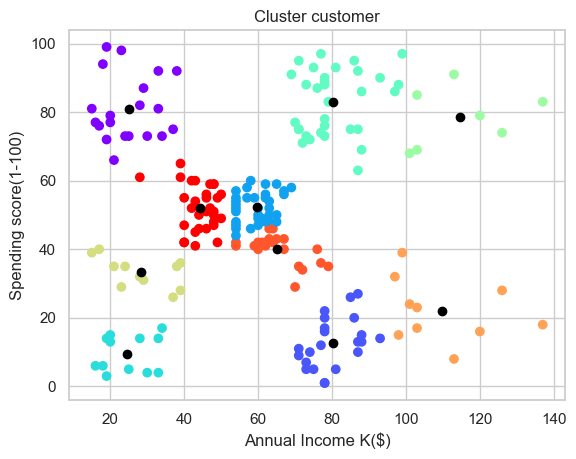

In [39]:
plt.scatter(x2[:,0],x2[:,1],c=Kmeans.labels_, cmap="rainbow")
plt.scatter(Kmeans.cluster_centers_[:,0] , Kmeans.cluster_centers_[:,1], color = "black")
plt.title("Cluster customer")
plt.xlabel("Annual Income K($)")
plt.ylabel("Spending score(1-100)")
plt.show()

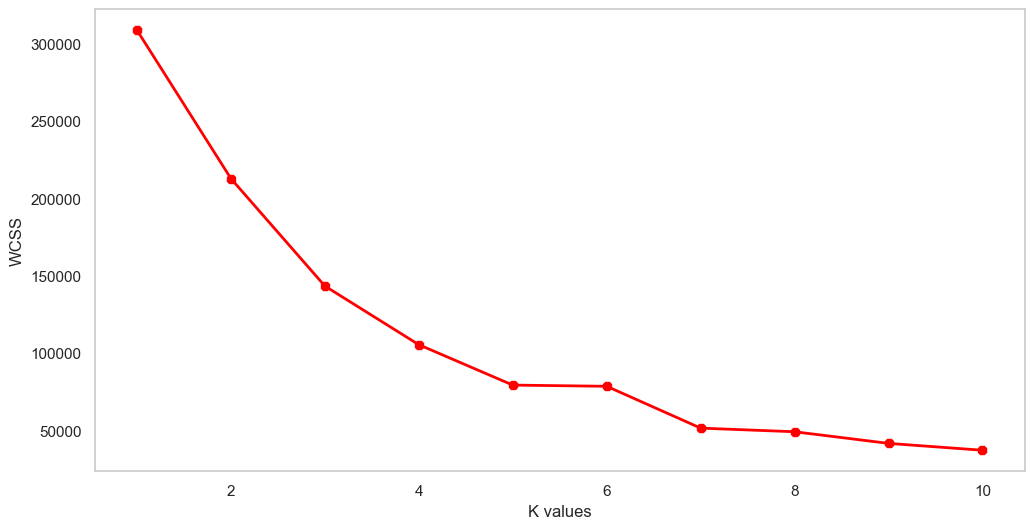

In [40]:
x3 = df.iloc[:,1:]
wcss = []
for  k in range(1,11):
    Kmeans = KMeans(n_clusters = k, init="k-means++")
    Kmeans.fit(x3)
    wcss.append(Kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color="red",marker="8")
plt.xlabel("K values")
plt.ylabel("WCSS")
plt.show()

In [41]:
kmeans = KMeans(n_clusters = 6)
label = kmeans.fit_predict(x3)
print(label)

[5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5
 4 5 4 3 4 3 1 5 4 3 1 1 1 3 1 1 3 3 3 3 3 1 3 3 1 3 3 3 1 3 3 1 1 3 3 3 3
 3 1 3 1 1 3 3 1 3 3 1 3 3 1 1 3 3 1 3 1 1 1 3 1 3 1 1 3 3 1 3 1 3 3 3 3 3
 1 1 1 1 1 3 3 3 3 1 1 1 2 1 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


In [42]:
print(kmeans.cluster_centers_)

[[41.68571429 88.22857143 17.28571429]
 [27.         56.65789474 49.13157895]
 [32.69230769 86.53846154 82.12820513]
 [56.15555556 53.37777778 49.08888889]
 [25.27272727 25.72727273 79.36363636]
 [44.14285714 25.14285714 19.52380952]]


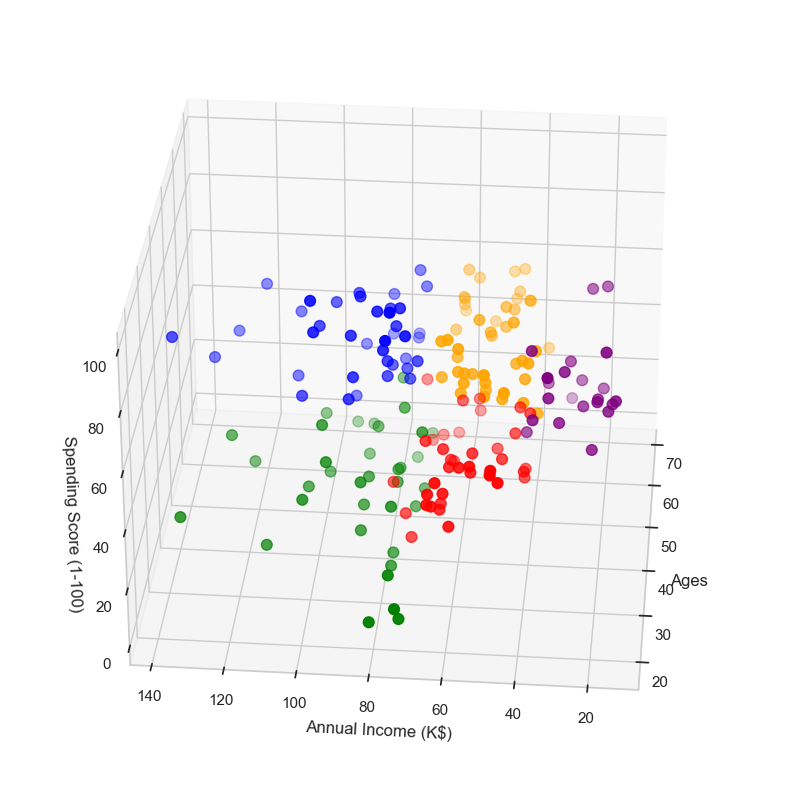

In [52]:
clusters = kmeans.fit_predict(x3)
df["label"] = clusters
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize =(20,10))
ax=fig.add_subplot(111,projection= "3d")
ax.scatter(df.Age[df.label==0],df["Annual Income (k$)"][df.label==0],df["Spending Score (1-100)"][df.label==0],c="blue", s=60)
ax.scatter(df.Age[df.label==1],df["Annual Income (k$)"][df.label==1],df["Spending Score (1-100)"][df.label==1],c="red", s=60)
ax.scatter(df.Age[df.label==2],df["Annual Income (k$)"][df.label==2],df["Spending Score (1-100)"][df.label==2],c="green", s=60)
ax.scatter(df.Age[df.label==3],df["Annual Income (k$)"][df.label==3],df["Spending Score (1-100)"][df.label==3],c="orange", s=60)
ax.scatter(df.Age[df.label==4],df["Annual Income (k$)"][df.label==4],df["Spending Score (1-100)"][df.label==4],c="purple", s=60)
# ax.scatter(df.Age[df.label==5],df["Annual Income K($)"][df.label==0],df["Spending Score (1-100"][df.label==0],c="", s=60]
ax.view_init(30,185)
plt.xlabel("Ages")
plt.ylabel("Annual Income (K$)")
ax.set_zlabel("Spending Score (1-100)")
plt.show()